### Pandapipes net from .csv tables using _plural_ create functions (e.g. `create_junctions`) instead of _singular_ ones ( e.g. `create_junction`)

This tutorial guides through the creation of a pandapipes net while taking [.csv files](https://en.wikipedia.org/wiki/Comma-separated_values) as input.
To make the process more convenient, _plural_ create functions (e.g. create_junctions) are used.

The .csv files specifying the network are in the "net_data_gas" folder which is located in the same folder as this notebook. They determine the [components](https://pandapipes.readthedocs.io/en/latest/components.html) of the example network used to illustrate this tutorial(see picture below): the junctions (i.e. nodes), the pipes, the external grids and the sinks.
<img src="pics/longniddry.png">

#### Import the necessary packages

In [1]:
import pandas as pd
import pandapipes as ppi
from pandapipes.plotting import simple_plot

#### Create an empty pandapipes network

In [2]:
fluid = 'hgas'  # other possible fluids: water, lgas, hydrogen
net = ppi.create_empty_network('gas test network', fluid=fluid) # create empty network

#### Extract the data from the .csv files as pandas DataFrames

The data are extracted as DataFrames using the pandas function `read_csv`. Let's start with the junctions' data.

In [5]:
pre_path = r".\files\longniddry_gas_net"
junctions_df = pd.read_csv(pre_path + r'\example_net-junctions.CSV')

Let's take a look at what is in the `junctions_df` DataFrame. The `head()` (from the pandas package) method displays the first 5 columns of the DataFrame, avoiding a crammed output.

In [6]:
junctions_df.head()


,Name,lat,lon,height
0,b0,6270716.410,2760327.163,0.0
1,b1,6270591.372,2759948.189,0.3
2,b2,6270456.361,2760038.450,0.6
3,b3,6270313.571,2760136.418,0.9
4,b4,6270214.431,2760177.492,1.2


The data of the other types of elements is also extracted

In [7]:
pipes_df = pd.read_csv(pre_path + r'.\example_net-pipes.CSV')

sinks_df = pd.read_csv(pre_path + r'.\example_net-sinks.CSV')

ext_grids_df = pd.read_csv(pre_path + r'.\example_net-ext_grid.CSV')

valves_df = pd.read_csv(pre_path + r'.\example_net-valves.CSV')

geodata = junctions_df[['lon', 'lat']].values

pipes_df.head()

,Name,from_junction,to_junction,length_km
0,l1,0,1,0.20
1,l2,1,2,0.05
2,l3,2,3,0.05
3,l4,3,4,0.05
4,l5,2,5,0.05


#### Create the network junctions and pipes based on the DataFrames
The .csv data do not specify any diameter for the pipes. A uniform diameter of 0.05 m is assumed for all pipes. Passing a single value as an argument for the diameter assigns this diameter to all pipes. It is alternatively possible to pass an iterable to assign different diameters to different pipes. This is valid for all other relevant parameters for junctions, pipes, sinks, sources...

In [8]:
amb_temp = 283.15
junctions = ppi.create_junctions(net, nr_junctions=len(junctions_df), pn_bar=1, tfluid_k=amb_temp,
                         height_m=junctions_df['height'], geodata=geodata)

In [9]:
pipes = ppi.create_pipes_from_parameters(net, pipes_df['from_junction'], pipes_df['to_junction'],
                                     length_km=pipes_df['length_km'], diameter_m=0.05, k_mm=0.2)

Note: There are two [functions to create pipes](https://pandapipes.readthedocs.io/en/latest/components/pipe/pipe_component.html) in pandapipes: `create_pipes_from_parameters` and `create_pipes` (and there are their equivalent _singular_ versions). The former creates pipes while passing the diameters as arguments (the user specifies the diameters while creating the pipes), while the latter creates pipes based on predefined [standard types](https://pandapipes.readthedocs.io/en/latest/standard_types/std_types_in_pandapipes.html).

Let's take a look at the pipes pandapipes table. The `head()` method can also be employed here. This table displays all the input parameters that specifies a pipe.

In [11]:
net.pipe.head()

,name,from_junction,to_junction,std_type,length_km,diameter_m,k_mm,loss_coefficient,alpha_w_per_m2k,text_k,qext_w,sections,in_service,type
0,None,0,1,None,0.20,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe
1,None,1,2,None,0.05,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe
2,None,2,3,None,0.05,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe
3,None,3,4,None,0.05,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe
4,None,2,5,None,0.05,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe


The input parameters can however be extended. Let's consider a slightly different .csv file for the pipes (namely _example_net-pipes_companies.CSV_) where the company owning each pipe is specified. This is not a parameter built in `create_pipes_from_parameters` function. THis information can however be passed as keyword argument to the create function as follows:

In [13]:
ppi.drop_pipes(net, net.pipe.index)

pipes_df = pd.read_csv(pre_path + r'\example_net-pipes_companies.CSV')

ppi.create_pipes_from_parameters(net, pipes_df['from_junction'], pipes_df['to_junction'],
                                     length_km=pipes_df['length_km'], diameter_m=0.05, k_mm=0.2, company = pipes_df['company'])
net.pipe.head()

hp.pandapipes.toolbox - INFO: dropped 0 pipes


,name,from_junction,to_junction,std_type,length_km,diameter_m,k_mm,loss_coefficient,alpha_w_per_m2k,text_k,qext_w,sections,in_service,type,company
0,None,0,1,None,0.20,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe,company B
1,None,1,2,None,0.05,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe,company A
2,None,2,3,None,0.05,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe,company B
3,None,3,4,None,0.05,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe,company C
4,None,2,5,None,0.05,0.05,0.2,0.0,0.0,293.0,0.0,1,True,pipe,company B


The elements creation is done in the next code cell for the sinks, external grids and valves.

NB: The create functions return the indices of the elements they create. To avoid displaying this output below the cells, the output of these function is assigned to the variables `junctions`, `pipes`, `sinks`, `ext_grids`, and `valves`. These variables have therefore no functional purpose in the present tutorial, only a cosmetic one.

In [14]:
sinks = ppi.create_sinks(net, sinks_df['junction'], mdot_kg_per_s=sinks_df['m_dot'])
ext_grids = ppi.create_ext_grids(net, junctions=ext_grids_df['junction'], p_bar=ext_grids_df['pressure'], t_k=amb_temp)
valves = ppi.create_valves(net, valves_df['from_junction'], valves_df['to_junction'], diameter_m=valves_df['diameter'])


#### Run a pipeflow

The pipeflow function is responsible for computing the pressures at the nodes and flow rates through the pipes of the network.

In [15]:
ppi.pipeflow(net)

#### Display the results of the pipeflow calculation

Running the pipeflow while among others create _res_ (for results) tables for every type of element. The results for the junctions  and the pipes are displayed as done in the next two cells.

In [16]:
net.res_junction

,p_bar,t_k
0,1.000000,283.15
1,0.999943,283.15
2,0.999926,283.15
3,0.999916,283.15
4,0.999913,283.15
5,0.999908,283.15
6,0.999899,283.15
7,0.999939,283.15
8,0.999909,283.15
9,0.999890,283.15


In [17]:
net.res_pipe.head()

,v_from_m_per_s,v_to_m_per_s,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_norm_m3_per_s,reynolds,lambda,normfactor_from,normfactor_to
0,0.139734,0.139741,0.139738,1.000000,0.999943,283.15,283.15,0.000373,-0.000373,0.000528,887.107091,0.100526,0.519405,0.519430
1,0.139741,0.139745,0.139743,0.999943,0.999926,283.15,283.15,0.000373,-0.000373,0.000528,887.107091,0.100526,0.519430,0.519443
2,0.064891,0.064892,0.064892,0.999926,0.999916,283.15,283.15,0.000173,-0.000173,0.000245,411.547674,0.183892,0.519443,0.519455
3,-0.009963,-0.009963,-0.009963,0.999916,0.999913,283.15,283.15,-0.000027,0.000027,-0.000038,64.011744,1.028198,0.519455,0.519465
4,0.074854,0.074858,0.074856,0.999926,0.999908,283.15,283.15,0.000200,-0.000200,0.000283,475.559418,0.162959,0.519443,0.519476


#### Plot the network
The parameters `plot_sinks` enable the plotting of sinks. The plotted size of the valves and junctions is tuned via the parameters `valve_size` and `junction_size`.

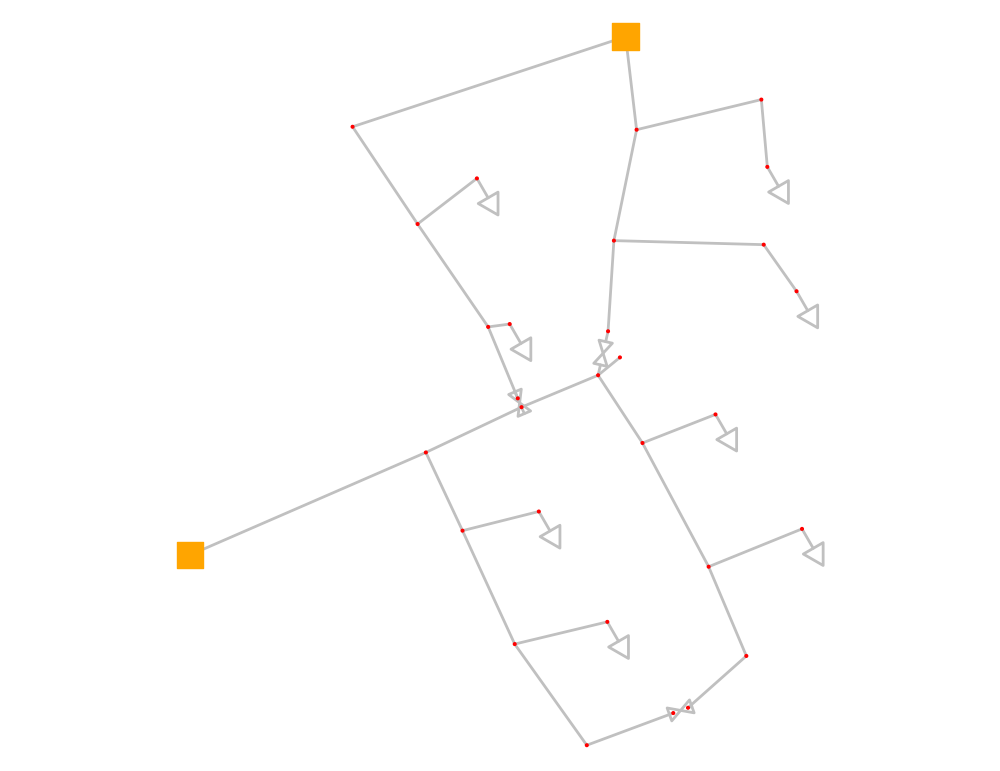

<AxesSubplot: >

In [18]:
simple_plot(net, plot_sinks=True, valve_size=0.6, junction_size=0.2)

#### Save the network

It is possible to save the network as .json file and to load it later. The network is saved as the file "workshop_example_gas.json".

In [20]:
ppi.to_json(net, "workshop_example_gas.json")

#loaded_net = ppi.from_json("workshop_example_gas.json")